In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#importing the data as a Pandas DataFrame
file_path='/content/drive/My Drive/Colab Notebooks/Day 1/Exercise/data_indian_air_quality.csv'
dataset=pd.read_csv(file_path,encoding="ISO-8859-1")
dataset.describe()

<ipython-input-31-c34844e61bcb>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv(file_path,encoding="ISO-8859-1")


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


The dataset consists primarily 5 different types pollutants measured over the years in different states and cities of India.

Where SO2 and NO2 are harmful gaseous emmissions; rspm, spm and pm2_5 come under susended air pollutants.

> The count clearly shows that there are variable number of Non-null entries for each of the pollutants.

> To understand the dataset further, we will have a look at all the different columns now and store them for future reference.




In [32]:
dataset.columns
#Apart from the major pollutants, there are columns that refer to the respective states, agencies, sampling dates and the type.
#We will now have a look at what kind of data each of the columns consists of.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

Understanding the pollutants briefly here.

**NO2**: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

**SO2**: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

**spm**: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

**rspm**: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.

**pm2_5**: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.

Let us get back to the data again and see how it is stored.


In [33]:
dataset.info()

#Now, we can immediatly see that there are quite a few nulls in various columns, which need work and first need a closer inspection.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [34]:
dataset.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


Clearly there are lots of null values, noticeably in stn_code,agency, both of which should therefore be not ncluded further in the analysis.

> Intuitively, these two columns will hardly add much value to analysis.

> Now, focusing on the categorical variables, we are left with location_monitoring_station which consists of considerable nulls (approximately 27000).

****It would have been useful to have those values for an in depth analysis, but for now we will keep it out because of the null values and come back later if needed.

1. Out of the two dates columns, immediate attention goes to sampling date which has different formats within, highlighting some data input issues.
1. While, it is importnat to have this metric, more useful is to go back to the origin of the dataset and ask relevant questions,as to why are there different formats? Is it a human error or error due to incorporating different formats.For now, we will keep it out and only have the date column.

In [35]:
dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [36]:
# Fixing the missing values firstly for all the pollutants.
# We will consider taking mean for all the pollutants columns
# and make use of the SimpleImputer class

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(dataset.iloc[:, 3:8].values)
dataset.iloc[:, 3:8] = imputer.transform(dataset.iloc[:, 3:8].values)

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       435742 non-null  float64
 4   no2       435742 non-null  float64
 5   rspm      435742 non-null  float64
 6   spm       435742 non-null  float64
 7   pm2_5     435742 non-null  float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,90.0,187.0,32.0,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,90.0,187.0,32.0,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,90.0,187.0,32.0,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,90.0,187.0,32.0,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,90.0,187.0,32.0,1990-03-01


In [40]:
#Fixing the missing values in the column 'type'
dataset['type'].describe()

,type
count,435742
unique,11
top,"Residential, Rural and other Areas"
freq,179014


In [41]:
#With 10 Unique labels, we will fill the null values by the most common type, which is 'Residential, Rural and Other Areas'.
common_value='Residential,Rural and other Areas'
dataset['type']=dataset['type'].fillna(common_value)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      435742 non-null  object 
 3   so2       435742 non-null  float64
 4   no2       435742 non-null  float64
 5   rspm      435742 non-null  float64
 6   spm       435742 non-null  float64
 7   pm2_5     435742 non-null  float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


We have fixed the missing values now and made the dataset much shorter to focus on the key variables.
> We should start with some preliminary visualisations, starting foremost with those of the pollutants

# Grouping the emmissions by state.
> Having looked at the pollutants distributions, we now would focus on how these emmissions are stacked across the indian states.
> We will use groupby on the dataset DataFrame and store it in another DataFrame as statewise_emmissions.

In [55]:
statewise_emissions_dataset = dataset[['state', 'so2', 'no2', 'rspm', 'spm', 'pm2_5']]

In [56]:
statewise_emmissions = statewise_emissions_dataset.groupby(['state']).mean()
statewise_emmissions

,so2,no2,rspm,spm,pm2_5
state,,,,,
Andhra Pradesh,7.303478,21.710627,78.693730,192.928648,32.000000
Arunachal Pradesh,4.411111,9.877778,76.777778,187.000000,32.000000
Assam,6.732033,14.823095,93.671427,176.755953,32.000000
Bihar,18.641055,36.030945,109.749011,257.352967,32.000000
Chandigarh,5.239155,18.990000,96.294836,198.073592,32.000000
Chhattisgarh,12.535921,24.695139,121.502913,209.295365,32.000000
Dadra & Nagar Haveli,8.932177,18.323186,80.698738,176.047319,31.899054
Daman & Diu,8.192711,16.168926,80.877238,157.147059,31.768542
Delhi,8.673383,51.485861,173.144352,322.598526,34.738276


<Figure size 5000x500 with 0 Axes>

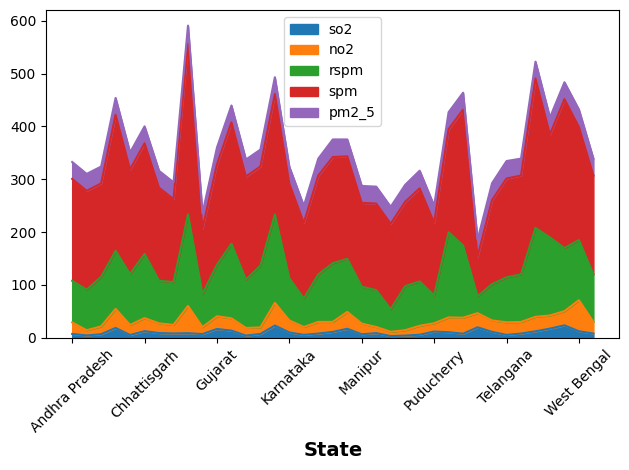

In [68]:
plt.figure(figsize=(50, 5))
statewise_emmissions.plot.area()

plt.xlabel('State', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

***The highest emmissions are for spm, for each of the states.*

> Getting the statistics for highest emmissions, when grouped statewise.

In [69]:
statewise_emmissions.describe()

,so2,no2,rspm,spm,pm2_5
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,10.288552,22.914207,98.335121,192.235206,32.111308
std,5.287170,10.781426,35.266588,46.043665,0.779564
min,3.174263,8.162875,32.000000,75.000000,29.055962
25%,6.732033,15.670119,78.693730,163.859590,32.000000
50%,8.673383,22.000000,90.000000,187.000000,32.000000
75%,12.373024,26.800000,116.768037,200.915798,32.000000
max,23.525965,58.826502,173.144352,322.598526,34.738276


In [70]:
Top10States_with_highest_No2=statewise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top10States_with_highest_No2_sorted=Top10States_with_highest_No2.loc[:,['no2']]
Top10States_with_highest_No2_sorted.head()

,no2
state,
West Bengal,58.826502
Delhi,51.485861
Jharkhand,42.890181
Bihar,36.030945
Maharashtra,31.911502


1. West Bengal and Delhi show the highest NO2 emmissions over the years.
1. Questions to ask: Have the Vehicles emmiting NOx and NO2 have been monitored well in these two states?
1. What type of Industrial waste is being generated in these two states?

In [71]:
Top10states_with_highest_So2=statewise_emmissions.sort_values(by='so2',ascending=False).head(10)
Top10states_with_highest_So2_sorted=Top10states_with_highest_So2.loc[:,['so2']]
Top10states_with_highest_So2_sorted.head()

,so2
state,
Uttaranchal,23.525965
Jharkhand,23.179607
Sikkim,19.800000
Bihar,18.641055
Uttarakhand,17.359554


1. With Uttaranachal and Jharkand right at the top, it would be wise to ask whether the coal mining industry in these two states regulated well, as a substantial amount of SO2 emmission can come from the combustion of coal.
> Importantly, there are no states from South India.

In [72]:
Top10states_with_highest_rspm=statewise_emmissions.sort_values(by='rspm',ascending=False).head(10)
Top10states_with_highest_rspm_sorted=Top10states_with_highest_rspm.loc[:,['rspm']]
Top10states_with_highest_rspm_sorted.head()

,rspm
state,
Delhi,173.144352
Uttar Pradesh,168.201432
Jharkhand,167.320525
Punjab,161.031865
Uttarakhand,147.655565


In [73]:
Top10states_with_highest_spm=statewise_emmissions.sort_values(by='spm',ascending=False).head(10)
Top10states_with_highest_spm_sorted=Top10states_with_highest_spm.loc[:,['spm']]
Top10states_with_highest_spm_sorted.head()

,spm
state,
Delhi,322.598526
Uttar Pradesh,282.581068
Uttaranchal,281.645614
Bihar,257.352967
Rajasthan,257.079565


****The distribution for spm is generally on the higher side, but Delhi and Uttar Pradesh show the highest presence of suspended Particulate matter.

1. Are their specific insustries that contribute higher to the spm concentration in and around Delhi?
> To be underlined is the non-presence of Southern and North eastern states.

In [74]:
Top10states_with_highest_pm2_5=statewise_emmissions.sort_values(by='pm2_5',ascending=False).head(10)
Top10states_with_highest_pm2_5_sorted=Top10states_with_highest_pm2_5.loc[:,['pm2_5']]
Top10states_with_highest_pm2_5_sorted.head()

,pm2_5
state,
Delhi,34.738276
Odisha,33.475647
Madhya Pradesh,33.376030
Telangana,33.065108
West Bengal,32.937097


> The data output can be misleading owing to the missing values of pm2_5 values and subsequent mean.
> Neverthless, Delhi still shows highest measured value of pm2_5.


In [79]:
locationwise_emmissions_dataset = dataset[['location', 'so2', 'no2', 'rspm', 'spm', 'pm2_5']]

In [82]:
#Getting the statistics citywise for the pollutants
locationwise_emmissions=locationwise_emmissions_dataset.groupby('location').mean()
locationwise_emmissions

,so2,no2,rspm,spm,pm2_5
location,,,,,
ANKLESHWAR,18.940120,22.898204,83.868263,187.000000,32.556886
Agra,6.473679,19.912205,170.617917,286.625855,32.000000
Ahmedabad,14.167531,22.349807,93.759132,206.579495,31.708600
Aizawl,3.735769,9.843856,42.534819,148.398971,32.000000
Akola,7.937023,9.357824,133.359259,187.000000,32.000000
...,...,...,...,...,...
Warangal,5.503968,11.754444,53.457143,182.560317,32.000000
Wayanad,2.006445,6.012109,36.984375,187.000000,32.000000
West Singhbhum,20.947020,30.715232,246.417219,187.000000,32.000000


In [83]:
Top10Cities_with_highest_NO2=locationwise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top10Cities_with_highest_NO2_sorted=Top10Cities_with_highest_NO2.loc[:,['no2']]
Top10Cities_with_highest_NO2_sorted.head()


,no2
location,
Howrah,77.168734
Badlapur,64.451282
Dombivli,60.474728
Kolkata,60.180732
Ulhasnagar,59.783158


In [84]:

Top10Cities_with_highest_So2=locationwise_emmissions.sort_values(by='so2',ascending=False).head(10)
Top10Cities_with_highest_So2_sorted=Top10Cities_with_highest_So2.loc[:,['so2']]
Top10Cities_with_highest_So2_sorted.head()



,so2
location,
Byrnihat,45.475065
Jamshedpur,38.092774
Nanded,38.076816
Gajroula,37.975576
Dharuhera,37.800000


In [85]:
Top10Cities_with_highest_rspm=locationwise_emmissions.sort_values(by='rspm',ascending=False).head(10)
Top10Cities_with_highest_rspm_sorted=Top10Cities_with_highest_rspm.loc[:,['rspm']]
Top10Cities_with_highest_rspm_sorted.head()

,rspm
location,
West Singhbhum,246.417219
Ghaziabad,240.207928
Allahabad,230.728747
Bareilly,229.462106
Ludhiana,210.009526


In [86]:
Top10Cities_with_highest_spm=locationwise_emmissions.sort_values(by='spm',ascending=False).head(10)
Top10Cities_with_highest_spm_sorted=Top10Cities_with_highest_spm.loc[:,['spm']]
Top10Cities_with_highest_spm_sorted.head()

,spm
location,
Meerut,432.239084
"Noida, Ghaziabad",432.074074
Dehradoon,379.370229
Noida,343.975210
Dharuhera,339.000000


In [87]:
Top10Cities_with_highest_pm2_5=locationwise_emmissions.sort_values(by='pm2_5',ascending=False).head(10)
Top10Cities_with_highest_pm2_5_sorted=Top10Cities_with_highest_pm2_5.loc[:,['pm2_5']]
Top10Cities_with_highest_pm2_5_sorted.head()

,pm2_5
location,
Keonjhar,44.565789
Sangareddy,38.528505
Kalinga Nagar,38.145914
Barrackpore,37.359246
Bhopal,37.325892
